In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('penguins.csv', sep=',')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


2.(a)  Urcete 95% intervalove odhady stredni hodnoty hmotnosti samcu a samic druhu s nejvyssi hmotnost

Nejprve najdeme druh s nejvetsi hmotnosti:

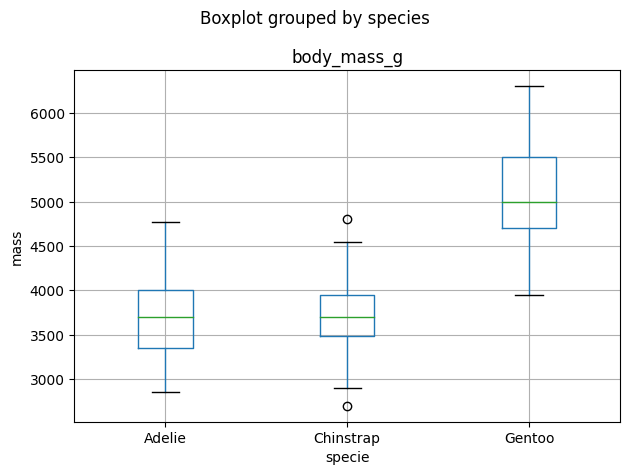

In [3]:
data.boxplot(column=['body_mass_g'], by=['species'])
plt.xlabel('specie')
plt.ylabel('mass')
plt.tight_layout()

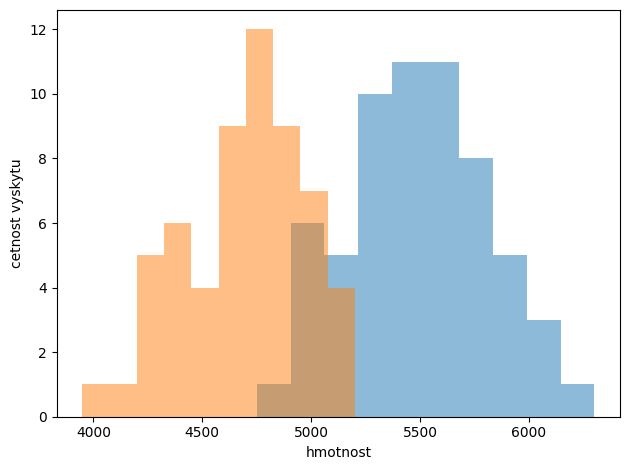

In [4]:
gentoo = data[data['species'] == 'Gentoo'][['body_mass_g', 'sex']]
gentoo_m = gentoo[gentoo['sex'] == 'male']
gentoo_f = gentoo[gentoo['sex'] == 'female']
gentoo_m['body_mass_g'].plot.hist(alpha=0.5)
gentoo_f['body_mass_g'].plot.hist(alpha=0.5)
plt.xlabel("hmotnost")
plt.ylabel("cetnost vyskytu")
plt.tight_layout()

Nejprve overime normalitu:

In [5]:
gentoo[['body_mass_g', 'sex']].groupby('sex').apply(stats.shapiro)

sex
female    (0.9813311100006104, 0.5106648802757263)
male      (0.9933638572692871, 0.9850469827651978)
dtype: object

=> muzeme povazovat jednotlive vybery za vybery z normalniho rozdeleni.

In [6]:
mean_m = gentoo_m['body_mass_g'].mean()
var_m = gentoo_m['body_mass_g'].var()**0.5
a_m = mean_m - 2 * var_m
b_m = mean_m + 2 * var_m
print('Hledany interval pro samcu: ({}, {})'.format(a_m, b_m))

mean_f = gentoo_f['body_mass_g'].mean()
var_f = gentoo_f['body_mass_g'].var()**0.5
a_f = mean_f - 2 * var_f
b_f = mean_f + 2 * var_f
print('Hledany interval pro samic: ({}, {})'.format(a_f, b_f))

Hledany interval pro samcu: (4858.51887433301, 6111.153256814531)
Hledany interval pro samic: (4116.5847920250835, 5242.897966595607)


2.(b) U kterych druhu se lisi prumerna delka kridel samcu a samic?

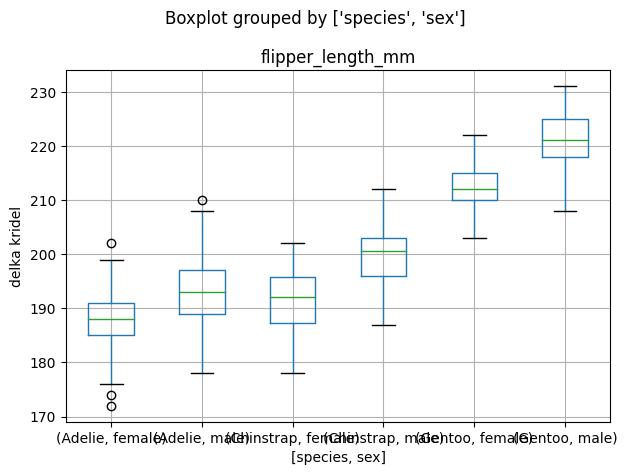

In [7]:
data.boxplot(column=['flipper_length_mm'], by=['species', 'sex'])
plt.ylabel('delka kridel')
plt.tight_layout()

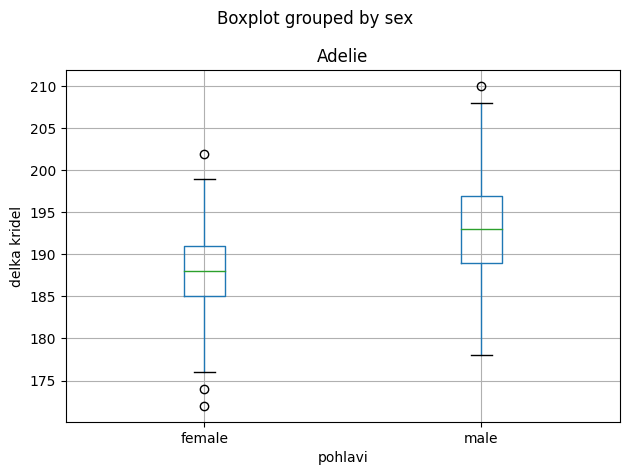

In [8]:
data[data['species'] == 'Adelie'].boxplot(column=['flipper_length_mm'], by='sex')
plt.title('Adelie')
plt.ylabel('delka kridel')
plt.xlabel('pohlavi')
plt.tight_layout()

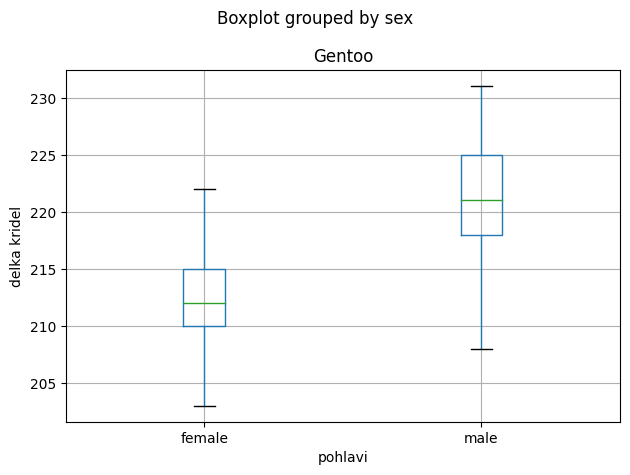

In [9]:
data[data['species'] == 'Gentoo'].boxplot(column=['flipper_length_mm'], by='sex')
plt.title('Gentoo')
plt.ylabel('delka kridel')
plt.xlabel('pohlavi')
plt.tight_layout()

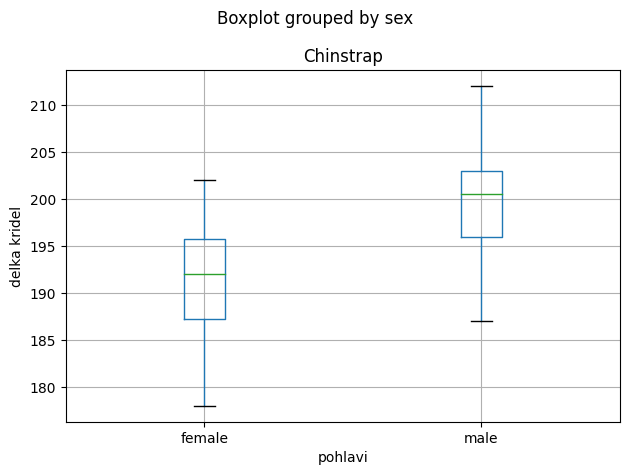

In [10]:
data[data['species'] == 'Chinstrap'].boxplot(column=['flipper_length_mm'], by='sex')
plt.title('Chinstrap')
plt.ylabel('delka kridel')
plt.xlabel('pohlavi')
plt.tight_layout()

In [11]:
data[data['species'] == 'Gentoo'][['sex', 'flipper_length_mm']].groupby('sex').apply(stats.shapiro)

sex
female    (0.9739449620246887, 0.24497611820697784)
male      (0.9618440270423889, 0.05452100560069084)
dtype: object

In [12]:
data[data['species'] == 'Chinstrap'][['sex', 'flipper_length_mm']].groupby('sex').apply(stats.shapiro)

sex
female     (0.971615195274353, 0.5074164271354675)
male      (0.9752680063247681, 0.6200605034828186)
dtype: object

In [13]:
data[data['species'] == 'Adelie'][['sex', 'flipper_length_mm']].groupby('sex').apply(stats.shapiro)

sex
female    (0.9841391444206238, 0.49121350049972534)
male       (0.9842701554298401, 0.4984263479709625)
dtype: object